## Introduction

The Breast Cancer dataset is a widely used dataset for binary classification. It contains features computed from digitized images of breast masses, including metrics like radius, texture, smoothness, compactness, etc. The target variable indicates whether the tumor is malignant or benign.

In this mini project, we aim to build a Logistic Regression model to classify tumors as malignant or benign. The project demonstrates a beginner-friendly, end-to-end workflow, including data loading, train-test splitting, model training, evaluation, and interpretation of feature importance.

Logistic Regression is a supervised machine learning algorithm used for classification, not regression.
It is used when the output (target variable) is categorical, especially:

* Binary classification (0/1, Yes/No, True/False)

* Multiclass classification (if extended with softmax)

Binomial Logistic Regression is a supervised machine learning algorithm used when the target variable has only two possible classes, such as:

* 0 or 1

* Yes or No

* Malignant or Benign

* Spam or Not Spam

It predicts the probability that a sample belongs to a particular class.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,6)

# Loading datasets 


In [ ]:
data = load_breast_cancer()


# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target column
df['target'] = data.target
df['target_name'] = df['target'].map({0: 'Malignant', 1: 'Benign'})

#  describe the dataset
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [4]:
# Check first few rows
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst perimeter  worst area  worst smoothness  \
0          

In [5]:
df['target_name'].value_counts()

target_name
Benign       357
Malignant    212
Name: count, dtype: int64

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
# Check missing values
print(df.isna().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
target_name                0
dtype: int64


### sns.countplot(...)

This creates a count plot (bar chart).

It counts how many times each unique value appears in the column 'target' of your DataFrame df.

If target has classes like 0 and 1, it will show how many 0s and how many 1s you have.

 * Purpose:
        To visualize the class distribution in a classification dataset.

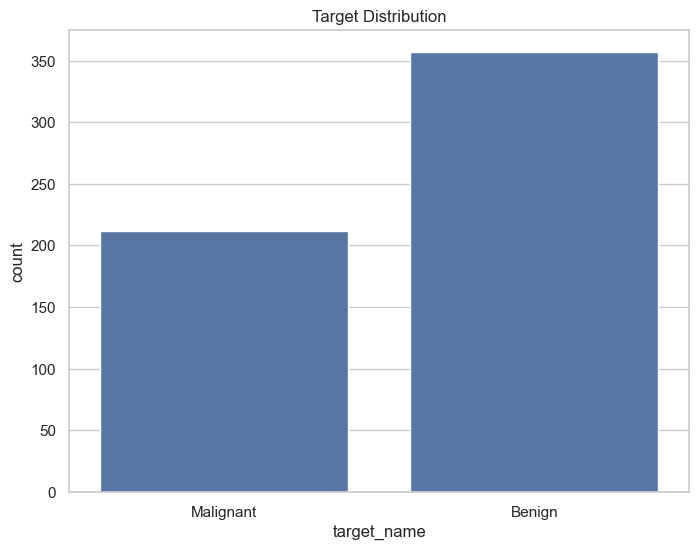

In [18]:
# Check target distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target_name', data=df)
plt.title("Target Distribution")
plt.show()


In [9]:
X, y = data.data, data.target
feature_names = data.feature_names

print("Dataset Shape:", X.shape)
print("Features:", feature_names[:5], "...")
print("Target classes:", data.target_names)

Dataset Shape: (569, 30)
Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness'] ...
Target classes: ['malignant' 'benign']


# Train / Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=23)

## Train Logistic Regression Model

In [11]:
clf = LogisticRegression(max_iter = 10000, random_state=0)
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [12]:
y_pred = clf.predict(X_test)

### Checking accuracy of the model

In [13]:
acc = accuracy_score(y_test, y_pred) * 100
print(f"\nLogistic Regression Model Accuracy: {acc:.2f}%")



Logistic Regression Model Accuracy: 96.49%


### Confusion Matrix
A confusion matrix is a table used to evaluate the performance of a classification model.
It compares the model’s predicted labels with the actual true labels.

It helps us understand how many predictions were correct and how many were wrong, and what types of errors your model makes.


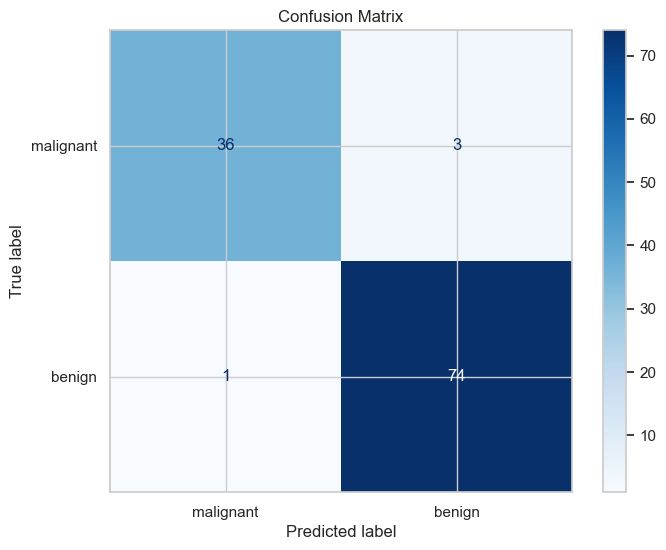

In [14]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Above is an confusion matrix for malignant and benign where,

* Top-left: TP (True Positive) → Model predicted Positive and it was Positive . Here , Malignant correctly predicted as Malignant = 36.

* Bottom-right: TN (True Negative) → Model predicted Negative and it was Negative . Here , Benign correctly predicted as Benign = 74

* Top-right: FP (False Positive) → Model predicted Positive but it was Negative. Here , Malignant incorrectly predicted as Benign = 3

Also called Type I Error

* Bottom-left: FN (False Negative) → Model predicted Negative but it was Positive. Here , Benign incorrectly predicted as Malignant = 1

Also called Type II Error

# Classification Report

In [15]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))



Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.92      0.95        39
      benign       0.96      0.99      0.97        75

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



## Feature Importance ( Coefficients )

In [16]:
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": clf.coef_[0]})
coef_df = coef_df.sort_values(by="Coefficient", key=abs, ascending=False)
print("\nTop 10 Important Features:")
print(coef_df.head(10))


Top 10 Important Features:
                 Feature  Coefficient
11         texture error     1.494834
26       worst concavity    -1.414572
0            mean radius     1.125264
28        worst symmetry    -0.715175
25     worst compactness    -0.696270
27  worst concave points    -0.575360
6         mean concavity    -0.533645
21         worst texture    -0.424387
24      worst smoothness    -0.338936
2         mean perimeter    -0.282115


## Visualize top 10 features

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11940\3356811149.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), palette="viridis")


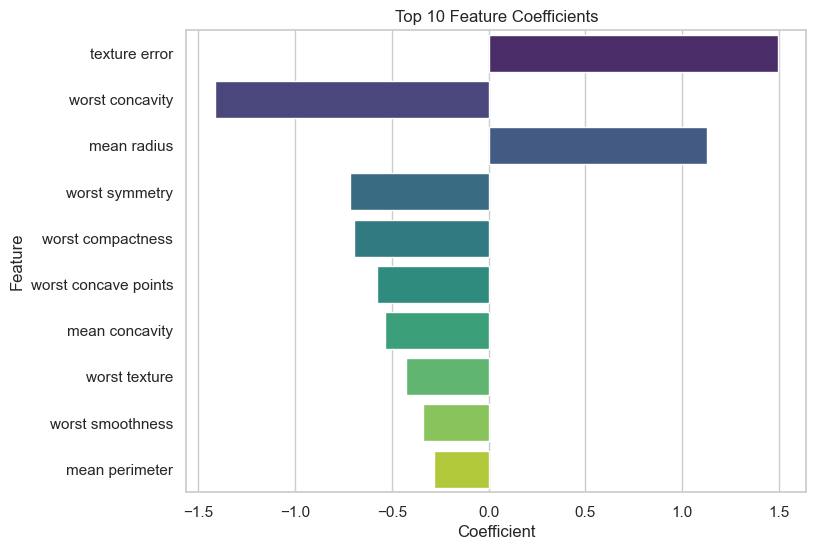

In [17]:
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), palette="viridis")
plt.title("Top 10 Feature Coefficients")
plt.show()

## Conclusion

In this mini project, a Logistic Regression classifier was trained to distinguish between malignant and benign tumors.

The model achieved an accuracy of around 96.4%, showing high predictive performance.

The confusion matrix and classification report provided insights into true and false predictions.

Analysis of feature coefficients highlighted which features have the most influence on predictions.

This beginner-friendly project illustrates the complete machine learning workflow: loading data, preprocessing (splitting), training a model, evaluating performance, and interpreting results.